# Impact of Lockdown on Immunity

Consider a seasonal SIRS model with a period of no circulation.


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
def sirs_dx(t,x,betafun,A,gamma,omega):
    yr = t/365.0
    beta = betafun(yr)
    dx = np.zeros(4)
    dx[0] = -beta*(x[0])*(x[1]) + omega*x[2]
    dx[1] = beta*(x[0])*(x[1]) - gamma*x[1]
    dx[2] = gamma*x[1] - omega*x[2]
    dx[3] = beta*(x[0])*(x[1])
    return dx

In [3]:
beta0 = 0.55
A = 0.1
gamma = 0.2
R0 = beta0/gamma
omega = 0.003
i0 = 0.0001
ypre = 16
ylock = 1
ypost = 3
tmax = (ypre + ylock + ypost)*365.0

In [4]:
def mybf(yr):
    if (yr <= ypre) or (yr >= (ypre + ylock)):
        return (beta0 + A*np.sin(2.0*np.pi*yr))
    else:
        return 0.5*gamma

In [5]:
odefun = lambda t,x: sirs_dx(t,x,mybf,A,gamma,omega)

sol = integrate.solve_ivp(odefun,
                          t_span = (0.0,tmax), 
                          y0 = np.array([1.-i0, i0, 0.0, 0.0]), #initial conditions
                          t_eval = np.arange(0.0,tmax,7),
                          method = 'RK45',
                          atol=1e-12,
                          rtol=1e-12,
                         )

np.random.seed(198)
hh = np.random.poisson(100*np.diff((sol.y[3]).T))

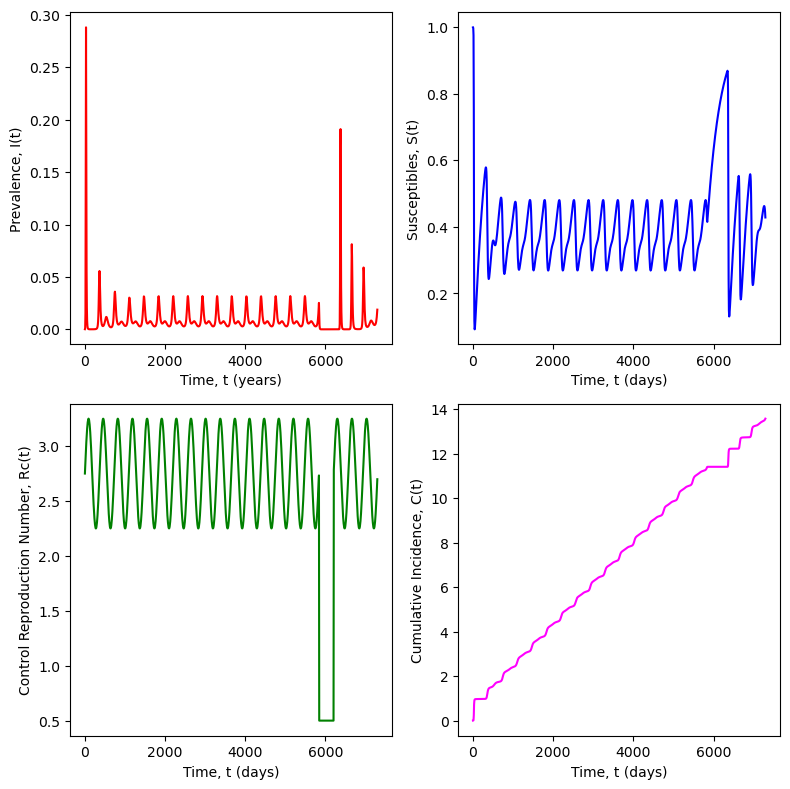

In [6]:
ss = (sol.y[0]).T
ii = (sol.y[1]).T
rr = (sol.y[2]).T
bb = np.array([mybf(u)/gamma for u in sol.t/365.0])
uu = sol.t
ci = (sol.y[3]).T

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.plot(uu, ii, c='red')
plt.xlabel('Time, t (years)')
plt.ylabel('Prevalence, I(t)')

plt.subplot(2,2,2)
plt.plot(uu, ss, c='blue')
plt.xlabel('Time, t (days)')
plt.ylabel('Susceptibles, S(t)')

plt.subplot(2,2,3)
plt.plot(uu, bb, c='green')
plt.xlabel('Time, t (days)')
plt.ylabel('Control Reproduction Number, Rc(t)')

plt.subplot(2,2,4)
plt.plot(uu, ci, c='magenta')
plt.xlabel('Time, t (days)')
plt.ylabel('Cumulative Incidence, C(t)')

plt.tight_layout()
plt.savefig('./rsv_stylised.pdf')

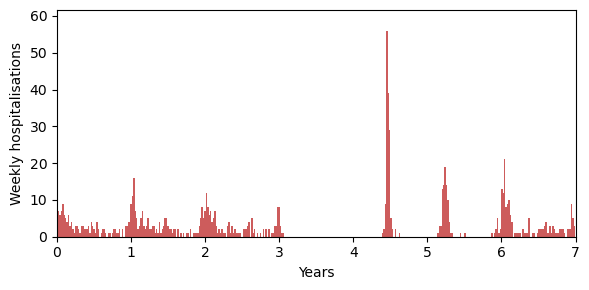

In [7]:
np.random.seed(198)
hh = np.random.poisson(200*np.diff(ci))
tt = (uu/365.0) - 13

plt.figure(figsize=(6,3))
plt.bar(tt[1:],
        hh,
        width = tt[1]-tt[0],
        facecolor='indianred')
plt.xlabel('Years')
plt.ylabel('Weekly hospitalisations')
plt.xlim([0.,7])
plt.ylim([0.,1.1*np.max(hh[tt[1:]>0])])

plt.tight_layout()
plt.savefig('./stylised_hosp.pdf')

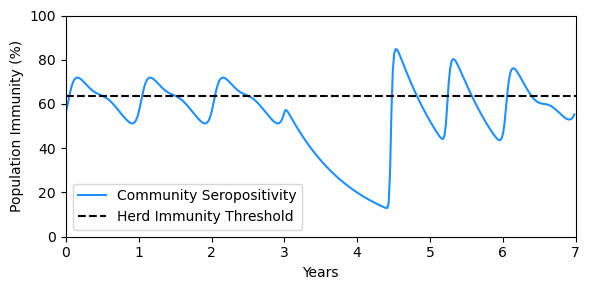

In [8]:
plt.figure(figsize=(6,3))
plt.plot(tt,
         100*rr,
         c='dodgerblue',
         label = 'Community Seropositivity'
        )
plt.plot([0, 7],
         100*(1-(gamma/beta0))*np.ones(2),
         ls = '--',
         c= 'k',
         label = 'Herd Immunity Threshold'
        )
plt.xlabel('Years')
plt.ylabel('Population Immunity (%)')
plt.xlim([0.,7])
plt.ylim([0.,100])

plt.legend(loc='lower left')

plt.tight_layout()
plt.savefig('./stylised_serology.pdf')